## 6. Feladatsor (Runge-Kutta módszerek: hibabecslés, beágyazott módszerek, adaptivitás)

**Differenciálegyenlet**

Most is csak autonóm egyenletekkel foglalkozunk, azaz legyen a kezdetiérték-problémánk

$$ 
\begin{cases}
\dot x(t) &= f(x(t)), \\
x(0) &= x_0. \\
\end{cases}
$$

A feltevésünk miatt a kezdeti időpont persze nem számít, lehet $0$.

**Diszkretizáció**

A folytonos dinamikai rendszer állapotterét $s$ idővel előretoló operátor legyen ismét
$$\phi(s, p) = p + \int\limits_0^s f(\phi(\tau, p)) \, d\tau,$$
ahol $p$ egy tetszőleges állapot. Egy $h$ lépéshosszú (egylépéses) numerikus módszer választása megfelel egy diszkrét dinamikai rendszer definiálásának, mely esetén egy diszkrét idejű lépéssel egy $h$ hosszú folytonos idejű lépést szeretnénk közelíteni. Jelöljük a diszkrét idő-előretoló operátort $ \phi_h $ módon.

Ezzel, például, amennyiben a kezdetiérték-probléma megoldása a $t = 1$ időpillanatban érdekel minket, akkor $h = \frac{1}{N}$ lépéshossz választás mellett tulajdonképpen a

$$
\phi(1, \cdot) \approx \underbrace{\phi_h \circ \ldots \circ \phi_h}_\text{N db}
$$

közelítést használjuk fel, ami a keresett $x_1$ értékre vonatkozólag a következőt jelenti:
$$
x_1 = \phi(1, x_0) \approx \underbrace{\left( \phi_h \circ \ldots \circ \phi_h\right)}_\text{N db}\left( x_0 \right).
$$

**Lokális hiba**

Lokális hiba alatt egy lépés hibáját értjük, azaz a $\phi_h$ és a $\phi(h, \cdot)$ függvények távolságát.

**Globális hiba**

Globális hiba alatt sok lépés együttes hibáját értjük, tehát ha például $h_1, \ldots h_N$ lépéshosszaink vannak, akkor a
$$
\phi\left(\sum_{i=1}^N h_i, \, \cdot\right) \approx \underbrace{\phi_{h_1} \circ \phi_{h_2} \circ \ldots \circ \phi_{h_N}}_\text{N db}
$$
közelítés során vétett hibát. A pontos definíció attól függ, hogy a diszkrét és a folytonos trajektóriák közötti eltérés mely aspektusai relevánsak számunkra (például érdekelhet minket egy adott, $t^*$ időpontbeli eltérés valamilyen normában, de akár a teljes trajektória menti eltérések átlaga is).

**Runge--Kutta módszerek rendje**

A kvadratúrákhoz hasonlóan az időintegrátorok esetén is beszélhetünk rendről. Ezt a lokális hibán keresztül szokás definiálni. Különböző tételek segítségével bizonyos feltételek mellett korlátok adhatók a globális hibára adott feladatcsalád és adott rendű numerikus módszerek esetén.

Ha a lokális hiba $\mathcal{O}(h^{p+1})$, akkor a módszerünk $p$-edrendű. Amint azt sejthetjük, a rend jellemzéséhez célszerű mind a pontos, mind a numerikus megoldást sorba fejteni a $t_0 = 0$ körül.

**A pontos megoldás első néhány deriváltja**

A kezdeti értéket és a differenciálegyenletet felhasználva (utóbbit néhányszor deriválva) látható, hogy
$$ 
\begin{align*}
x(0) &= x_0, \\
\dot x(0) &= f(x_0), \\
\ddot x(0) &= f'(x_0) f(x_0), \\
\dddot x(0) &= f''(x_0) f(x_0) f(x_0) + f'(x_0)f'(x_0)f(x_0).
\end{align*}
$$
Ez azt is jelenti persze, hogy a pontos megoldásra a következő sorfejtés vonatkozik:

$$
x(h) = x_0 + hf(x_0) + \frac{h^2}{2}f'(x_0)f(x_0) + \frac{h^3}{6}\left(f''(x_0) f(x_0) f(x_0) + f'(x_0)f'(x_0)f(x_0)\right) + \mathcal{O}(h^4).
$$

### 1. Feladat

Legyen $\phi_h = \operatorname{id} + hf$. Melyik numerikus módszerről van szó és mi a módszer rendje?

Kezdetnek vizsgáljuk a numerikus módszer hatását a lineáris tesztegyenleten, azaz legyen $hf = h\lambda = z$. 

Ekkor az alábbi közelítéssel dolgozhatunk:

$$
\begin{array}{}
\phi(h, x_0) & \approx &  \phi_h(x_0) \\
  | &  & | \\
 e^z x_0     & \approx &  (1+z)x_0,
\end{array}
$$
melyből azt is sejthetjük, hogy a rend egynél nem lehet magasabb, hiszen már az egyik legegyszerűbb feladaton sem kapunk elsőrendű közelítésnél pontosabbat.

Fejtsük sorba a módszer egy lépését adó 
$\phi_h(x_0) = y(h) = x_0 + hf(x_0)$ függvényt a $0$ körül, mely persze $h$-ban egy elsőfokú polinom, így nagy meglepetés nem ér minket amikor azt kapjuk, hogy

$$ 
\begin{align*}
y(0) &= x_0, \\
\dot y(0) &= f(x_0), \\
\ddot y(0) &= 0, \\
\end{align*}
$$
és persze a magasabb rendű deriváltak is nullák. A módszer egy lépésének sorfejtése tehát az eredeti formula,
$y(h) = x_0 + hf(x_0).$

### 2. Feladat

Legyen $$\phi_h(x_0) = x_0 + hf\left(x_0 + \frac12 h f(x_0)\right).$$
 
Runge--Kutta módszeről van szó? Ha igen, mi a Butcher-tablója? A lineáris tesztegyenleten való viselkedésén keresztül sejtsük meg a módszer rendjét, majd állapítsuk is meg sorfejtéssel.

---

**Numerikus hibamérés, rendbecslés**

Bár egy módszer rendje sokszor jó kiindulási alap a tényleges (globális) hiba megbecsüléséhez, tételek híján adott esetben csak a numerikus méréseinkre hagyatkozhatunk.

### 3. Feladat

Írjunk programot, ami megoldja az
$$
\dot  x = -10 x
$$ egyenletet $x(0) = 1$ kezdeti feltétellel, az EE módszer segítségével, majd leméri a $t=1$ időponthoz tartozó hibát h=$10^{-k}$ lépéshosszok mellett, ahol $k=0, 1, 2, 3$. 

a) A numerikus megoldást hasonlítsuk a pontos megoldáshoz.

b) Tegyük fel, hogy nem ismerjük a pontos megoldást. Számoljunk ki egy (remélhetőleg) kellően pontos numerikus megoldást (pl. legyen $h=10^{-7}$), tekintsük ezt pontos megoldásnak, majd használjuk ezt a hiba megbecsüléséhez.

### 4. Feladat

Ismételjük meg az előző feladatot az
$$ \dot x = -100x $$
egyenlettel! 

Hogyan alakul az adott $h$ választás mellett tapasztalt $t=1$ időpontbeli hiba a korábbi feladathoz képest?

In [113]:
# {3, 4} / {a, b} feladatok megoldása
using .Iterators

function ee_step(A, h, x)
    return x + h*A*x
end

function discretize(A, h, time_step)
    return x -> time_step(A, h, x)
end

for lam=[-10, -100]
    x1_kelloen_pontos = first(drop(iterate(discretize(lam, 1e-7, ee_step), 1), 10^7))
    
    print("diff.egyenlet: x'=", lam, "x\n")
    for k=0:3
        h = 10.0^(-k)
        phi_h = discretize(lam, h, ee_step)
        
        trajectory = iterate(phi_h, 1)
        x1 = first(drop(trajectory, 10^k))
        
        print("  k: ", k, "\n")
        print("    hiba pontos mo.-ból:   ", x1 - exp(lam), "\n")
        print("    hiba numerikus mo.-ból:", x1 - x1_kelloen_pontos, "\n")
    end
    print("\n")
end

diff.egyenlet: x'=-10x
  k: 0
    hiba pontos mo.-ból:   -9.000045399929762
    hiba numerikus mo.-ból:-9.000045399702763
  k: 1
    hiba pontos mo.-ból:   -4.5399929762484854e-5
    hiba numerikus mo.-ból:-4.5399702763245e-5
  k: 2
    hiba pontos mo.-ból:   -1.8838530874897456e-5
    hiba numerikus mo.-ból:-1.8838303875657603e-5
  k: 3
    hiba pontos mo.-ból:   -2.228682351826558e-6
    hiba numerikus mo.-ból:-2.2284553525867047e-6

diff.egyenlet: x'=-100x
  k: 0
    hiba pontos mo.-ból:   -99.0
    hiba numerikus mo.-ból:-99.0
  k: 1
    hiba pontos mo.-ból:   3.486784401e9
    hiba numerikus mo.-ból:3.486784401e9
  k: 2
    hiba pontos mo.-ból:   -3.720075976020836e-44
    hiba numerikus mo.-ból:-3.7182163905699815e-44
  k: 3
    hiba pontos mo.-ból:   -3.70259726350361e-44
    hiba numerikus mo.-ból:-3.700737678052755e-44



### 5. Feladat
A korábbi feladatokban mért hibákból hogyan tudnánk megbecsülni a numerikus módszerünk rendjét?

Implementáljuk "a Runge--Kutta módszert" és mérjük meg, hogy mennyire pontos megoldást produkál a harmonikus rezgőmozgást leíró
$$\ddot x = -x $$ egyenleten!

---

**Adaptív lépéshosszválasztás**

Mint azt a korábbi két feladat is remélhetőleg alátámasztja, a diszkretizálásnál egy jogosan felmerülő kérdés az, hogy a $h$ lépéshosszot (vagy $h_j$ lépéshosszokat) hogyan válasszuk meg.

A cél persze általában az, hogy a numerikus megoldást adott pontossággal ki tudjuk számolni. Erre lehetőségünk nyílik a lokális hiba lépéshosszon keresztüli befolyásolásával a következőképpen. 

Egy p-edrendű módszer esetén a lokális hiba

$$ \hat e = C h^{p+1} + \mathcal{O}(h^{p+2})$$

alakú. Tegyük fel, hogy úgy szeretnénk megválasztani a következő lépéshosszt, hogy a lokális hiba egy TOL tolerancia körül alakuljon. Keressük az új lépéshosszt $\rho h$ alakban, ahol tipikusan $0 \ll \rho \ll 2$. 

Ha a lépéshossz kicsi és a feladat kellően szép, akkor a $C$ konstans lényegében nem változik egyik lépésről a másikra, tehát ezen feltételek mellett a következő lépésnél a hiba az

$$ \text{TOL} \approx C (\rho h)^{p+1} + \mathcal{O}(h^{p+2}) $$

alakot ölti, mely formula már tartalmazza aziránti vágyunkat, hogy a jobboldalán álló kifejezés a TOL érték körül alakuljon.

Ha most feltesszük, hogy ismerjük a $\hat e$ lokális hibát (gyakorlatban csak ennek egy becslését), akkor a két formulában az $\mathcal{O}(h^{p+2})$ tagokat nullának tekintve, majd a maradékot egymással leosztva kapjuk, hogy

$$ \frac{\text{TOL}}{\hat e} \approx \left(\frac{\rho h}{h}\right)^{p+1}, $$

ami alapján legyen
$$ \rho = \left( \frac{\text{TOL}}{\hat e} \right)^{\frac{1}{p+1}}, $$

az új lépéshossz pedig persze $\rho h$.

Kérdés még, hogy hogyan határozzuk meg az $\hat e$ hibabecslést. Két lehetséges megközelítés a Richardson-extrapoláció és a beágyazott módszerek. Ezen a gyakorlaton az utóbbiakkal fogunk foglalkozni.

**Beágyazott módszerek**

A beágyazott módszerek alapötlét már a kvadratúráknál láttuk. A motiváció, hogy az RK-módszereknél a fő költség a $k_j$ meredekségek meghatározásában rejlik; az utolsó lépés, vagyis a $b_j$ értékekkel súlyozott átlag kiszámítása ehhez képest olcsó. 
Az ötlet egyszerű, jó beágyazott módszerek megtalálása már kevésbé.

Vegyünk egy $p+1$-edrendű (A, b) Butcher-tablójú RK-módszert, majd egy $p$-edrendűt, melynek Butcher-tablója csak a kvadratúra-súlyokban különbözik - azaz (A, b') alakú. Jelölésben ez annyit jelent, hogy a Butcher-tablóban szereplő b vektor alá írjuk a b' vektor elemeit.

A hibabecslésünk legyen a két módszer által adott megoldás különbsége, azaz tulajdonképpen a magasabb rendű módszer által adottat tekintjük pontos megoldásnak a hiba kiszámítása során.

### 5. Feladat

Implementáljuk a következő Butcher-tablójú beágyzott RK módszert!

<!-- Forras: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods -->
<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody><tr>
<td style="border-right:1px solid;">0
</td></tr>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">1/2</td>
<td style="border-bottom:1px solid;">1/2</td>
<td style="border-bottom:1px solid;">
</td></tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>0</td>
<td>1
</td></tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>1</td>
<td>0
</td></tr></tbody></table>

És alkalmazzuk is a kedvenc feladatunkra, mely természetesen a harmonikus rezgőmozgást leíró

$$ \ddot x = - x$$ 

egyenlet. Lépjünk a módszerünkkel addig, amíg egy kör megtételéhez megfelelő mennyiségű idő el nem telik. 


a) Nézzük meg, hogy a TOL tolerancia csökkentésével valóban pontosabb megoldást kapunk-e (pl. legyen TOL = 1e-2, 1e-4, 1e-6), valamint írjuk ki az átlagos lépéshosszokat.

In [48]:
using LinearAlgebra

In [62]:
function ee_adaptive_step(A, TOL, (t0, x0, h))
    k1 = A*x0
    k2 = A*(x0 + h/2*k1)

    x1 = x0 + h*k1
    # x1' = x0 + h*k2
    # err = x1 - x1' = h*(k1 - k2)

    rho = (TOL/norm(h*(k1 - k2)))^(1/2)
    h1 = max(1/2, min(rho, 2))*h
    return (t0+h1, x1, h1)
end

ee_adaptive_step (generic function with 2 methods)

In [63]:
using .Iterators

function iterate(f, x0)
    return Iterators.accumulate(f ∘ ((x, y) -> x), Iterators.repeated(x0))
end

iterate (generic function with 1 method)

In [64]:
using Plots

In [122]:
# kezdeti feltétel
x0 = [0
      1]

# egyenletrdsz. mátrixa
A = [0 -1
     1  0]

#segédfgv.
second(x) = x[2]

second (generic function with 1 method)

átlagos lépéshossz TOL=0.01 esetén: 0.1272844140914865
átlagos lépéshossz TOL=0.0001 esetén: 0.013897321394029917
átlagos lépéshossz TOL=1.0e-6 esetén: 0.0014106806477142276


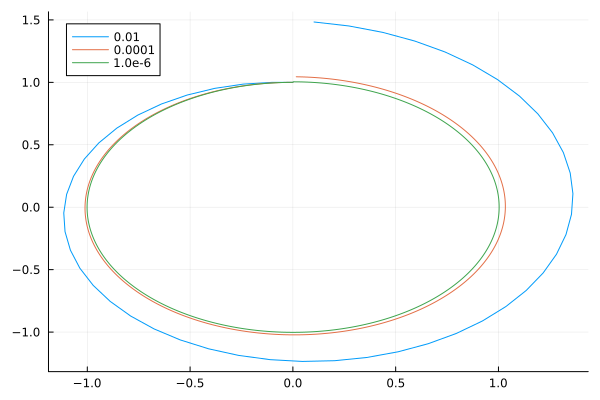

In [126]:
p = plot()

for TOL=[1e-2, 1e-4, 1e-6]
    adaptive_step(state) = ee_adaptive_step(A, TOL, state)

    # kezdeti lépéshossz
    h0 = 10*TOL # an educated guess :)
    
    trajectory = iterate(adaptive_step, (0, x0, h0))
    should_be_one_circle = takewhile((<=)(2*pi) ∘ first, trajectory)
    
    hxys = collect(should_be_one_circle)
    
    hs = map(last, hxys)
    print("átlagos lépéshossz TOL=", TOL, " esetén: ", sum(hs)/length(hs), "\n")
    
    xys = map(second, hxys)'
    plot!(map(first, xys)', map(last, xys)', label=TOL)
end
display(p)

b) Hogyan változnak a tapasztalt átlagos lépéshosszok ha a keringés sebességét növeljük, azaz például ha az

$$ \ddot x = - 4x$$

egyenletet nézzük?

átlagos lépéshossz TOL=0.01 esetén: 0.05106272831889034
átlagos lépéshossz TOL=0.0001 esetén: 0.005628241320759478
átlagos lépéshossz TOL=1.0e-6 esetén: 0.0005718810368642606


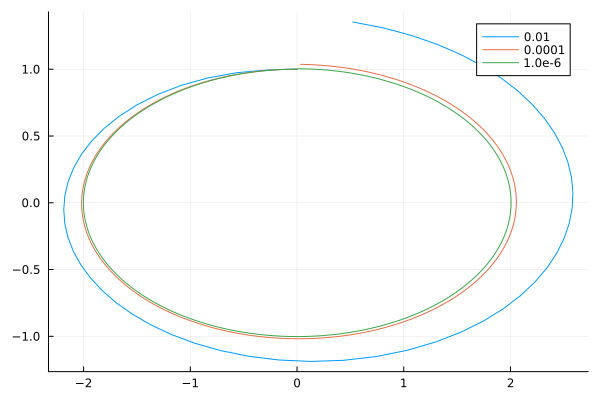

In [136]:
p = plot()

for TOL=[1e-2, 1e-4, 1e-6]
    adaptive_step(state) = ee_adaptive_step([0 -4
                                             1  0], TOL, state)

    # kezdeti lépéshossz
    h0 = TOL # an educated guess :)
    
    trajectory = iterate(adaptive_step, (0, x0, h0))
    should_be_one_circle = takewhile((<=)(2*pi/2) ∘ first, trajectory)
    
    hxys = collect(should_be_one_circle)
    
    hs = map(last, hxys)
    print("átlagos lépéshossz TOL=", TOL, " esetén: ", sum(hs)/length(hs), "\n")
    
    xys = map(second, hxys)'
    plot!(map(first, xys)', map(last, xys)', label=TOL)
end
display(p)

### 6. Feladat*

Implementáljuk a [Cash--Karp-módszert](https://en.wikipedia.org/wiki/Cash%E2%80%93Karp_method), mely egy gyakorlatban is jól használható beágyazott módszer.